In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv(r'C:\Users\ThinkPad\Documents\DS Project\train_processed.csv')

In [3]:
data = data.head(100)

In [4]:
def loss_function(m, b):
    error = 0

    for i in range(len(data)):
        x = data.iloc[i, 0]
        y = data.iloc[i, 1]
        y_pred = m * x + b
        error += np.mean((y - y_pred) ** 2)
    
    return error / len(data)

In [5]:
def stochastic_gradient_descent(m_now, b_now, learning_rate, batch_size):
    N = len(data)
    indices = np.random.permutation(N)
    for start in range(0, N, batch_size):
        end = min(start + batch_size, N)
        batch_idx = indices[start:end]
        m_gradient = 0
        b_gradient = 0
        for i in batch_idx:
            x = data.iloc[i, 0]
            y = data.iloc[i, 1]
            m_gradient += (-2 / batch_size) * x * (y - (m_now * x + b_now))
            b_gradient += (-2 / batch_size) * (y - (m_now * x + b_now))
        m_now -= learning_rate * m_gradient
        b_now -= learning_rate * b_gradient
    return m_now, b_now

Epoch 0: m = 1.46201978342287, b = 0.008121252677011673, loss = 276.0794540227744


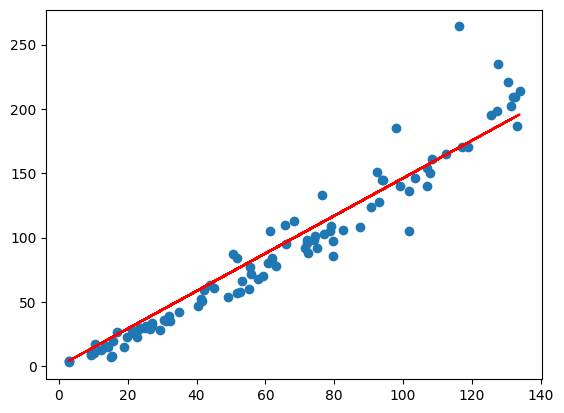

Epoch 1: m = 1.4621462428245917, b = 0.008081129858881047, loss = 276.0774310146797


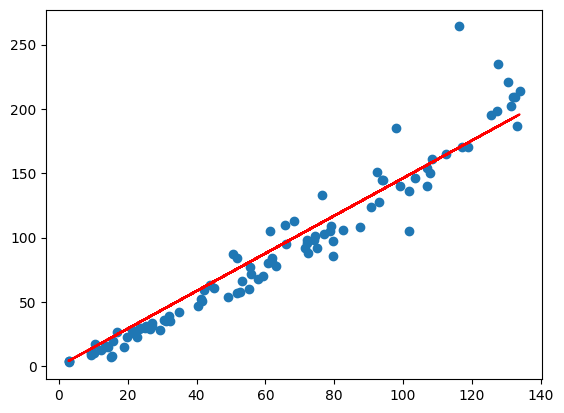

Epoch 2: m = 1.4622090848758211, b = 0.008040264406981381, loss = 276.076351648251


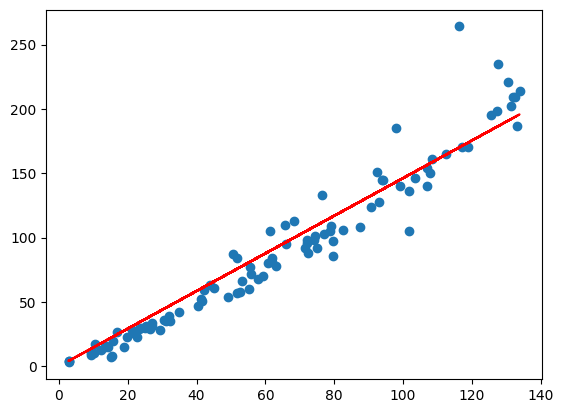

Epoch 3: m = 1.462249813432247, b = 0.007999148677593104, loss = 276.07557867394985


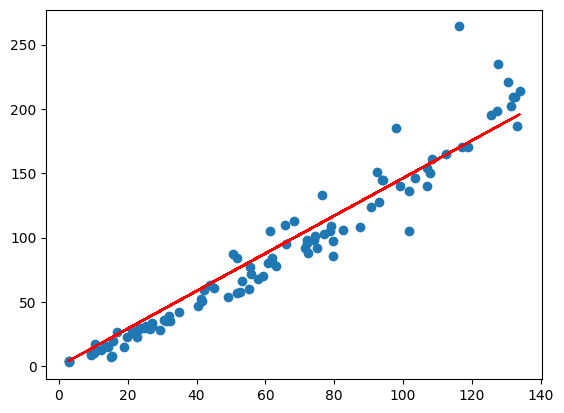

Epoch 4: m = 1.462341763674533, b = 0.007958577301469195, loss = 276.0742371431879


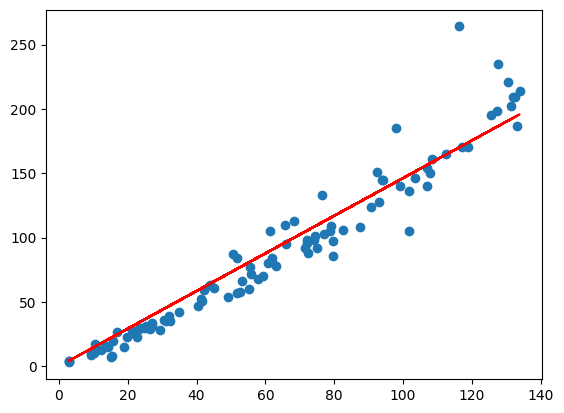

Epoch 5: m = 1.462402684107842, b = 0.007917675964879018, loss = 276.07330524256645


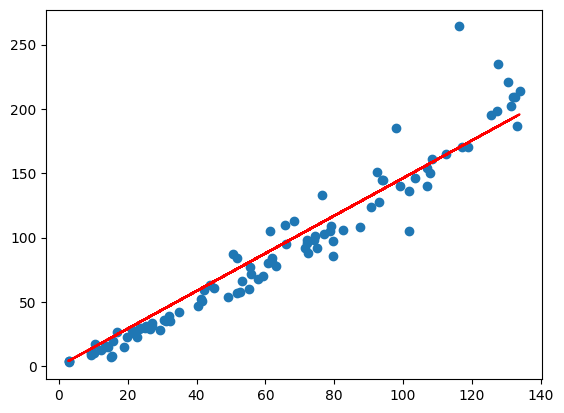

Epoch 6: m = 1.4624759268973055, b = 0.007876969647406671, loss = 276.0722911181488


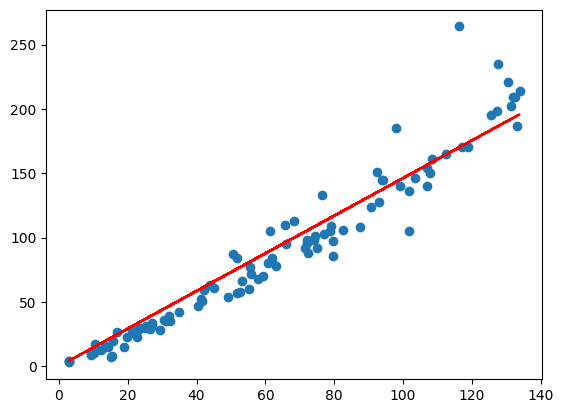

Epoch 7: m = 1.4625584338724578, b = 0.007836331661493482, loss = 276.0712496247182


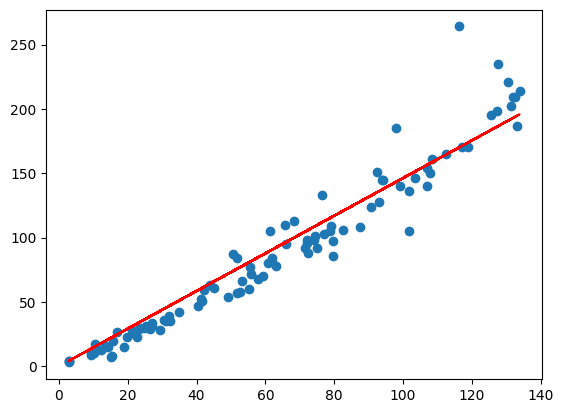

Epoch 8: m = 1.4626156444516236, b = 0.007795362396395656, loss = 276.07048514519624


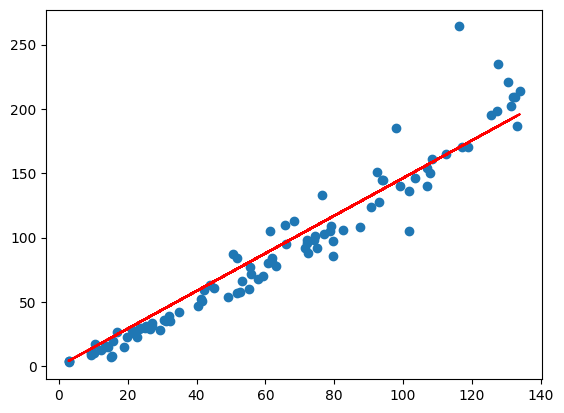

Epoch 9: m = 1.462688628066388, b = 0.00775461208780818, loss = 276.06963465935746


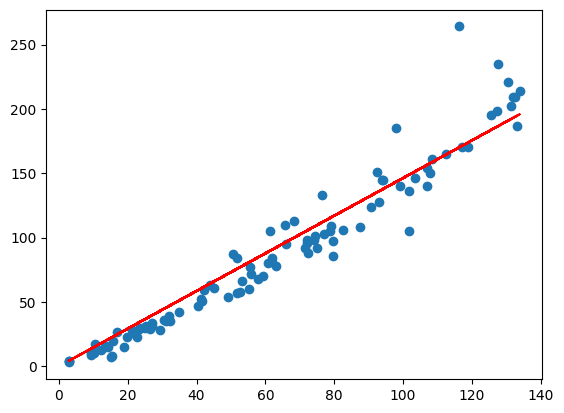

In [10]:
m = 1.4619143901608798
b = 0.0081616030321199
learning_rate = 0.000001
epochs = 10
batch_size = 16  # Ubah sesuai kebutuhan

for i in range(epochs):
    m, b = stochastic_gradient_descent(m, b, learning_rate, batch_size)
    if i % 1 == 0:
        print(f"Epoch {i}: m = {m}, b = {b}, loss = {loss_function(m, b)}")
        plt.scatter(data.iloc[:, 0], data.iloc[:, 1])
        plt.plot(data.iloc[:, 0], m * data.iloc[:, 0] + b, color='red')
        plt.show()